<a href="https://www.kaggle.com/code/kouroshsajjadi/eda-smart-buildings?scriptVersionId=173909171" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Notes
This work was done with the guidlines provided by Karzan Mohammed, Srinivasan Gopalan, and other lecturers of the course Data Science for Smart Building taught at Eindhoven University of Technology.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import glob
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Read Building Energy Dataset

In [3]:
path = '../input/building-energy-dataset'

# Use glob to get a list of all CSV files in the specified directory
all_files = glob.glob(path + "/*.csv")

# Initialize an empty list to store DataFrames
li = []

# Loop through each CSV file in the list of file paths
for filename in all_files:
    # Read the CSV file into a DataFrame
    # - 'filename': The name of the CSV file to be read
    # - 'index_col="Time"': Set the "Time" column as the index of the DataFrame
    # - 'parse_dates=True': Automatically parse date-like columns as datetime objects
    # - 'header=0': Use the first row of the CSV file as column headers
    df = pd.read_csv(filename, index_col="Time", parse_dates=True, header=0)
    
    # Append the DataFrame to the list of DataFrames
    li.append(df)

# Concatenate the list of DataFrames vertically (row-wise) into a single DataFrame
# - 'pd.concat()': Combine multiple DataFrames into one, stacking them vertically (axis=0)
# - 'li': List of individual DataFrames to concatenate
# - 'axis=0': Concatenate vertically
# - 'ignore_index=False': Preserve the original indices of the DataFrames
building = pd.concat(li, axis=0, ignore_index=False)

# Optionally, sort the DataFrame by the index if needed
# - 'building.sort_index()': Sort the DataFrame based on the index (row labels)
# - 'inplace=True': Apply the sorting operation directly to the 'building' DataFrame
building.sort_index(inplace=True)

#convert string index into datetime frame by using to_datetime() function
building.index = pd.to_datetime(building.index,format = "%d/%m/%Y %H:%M")

# Visualize Data

In [4]:
# Display information about the concatenated DataFrame
# - 'building.info()': Print details about the resulting DataFrame, including data types and memory usage
building.info()

building.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139188 entries, 2016-01-01 00:00:00 to 2021-12-31 23:59:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   HVAC Actual [kW]       float64
 1   Chiller Power [kW]     float64
 2   Humidifier power [kW]  float64
 3   HV light Power [kW]    float64
 4   Power[kW]              float64
 5   PV panels power [kW]   float64
 6   Battery system power   float64
dtypes: float64(7)
memory usage: 191.6 MB


,HVAC Actual [kW],Chiller Power [kW],Humidifier power [kW],HV light Power [kW],Power[kW],PV panels power [kW],Battery system power
Time,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.0,0.001,0.02,0.0,0.0
2016-01-01 00:01:00,0.0,0.0,0.0,0.001,0.02,0.0,0.0
2016-01-01 00:02:00,0.0,0.0,0.0,0.001,0.02,0.0,0.0
2016-01-01 00:03:00,0.0,0.0,0.0,0.001,0.02,0.0,0.0
2016-01-01 00:04:00,0.0,0.0,0.0,0.001,0.02,0.0,0.0


<Axes: >

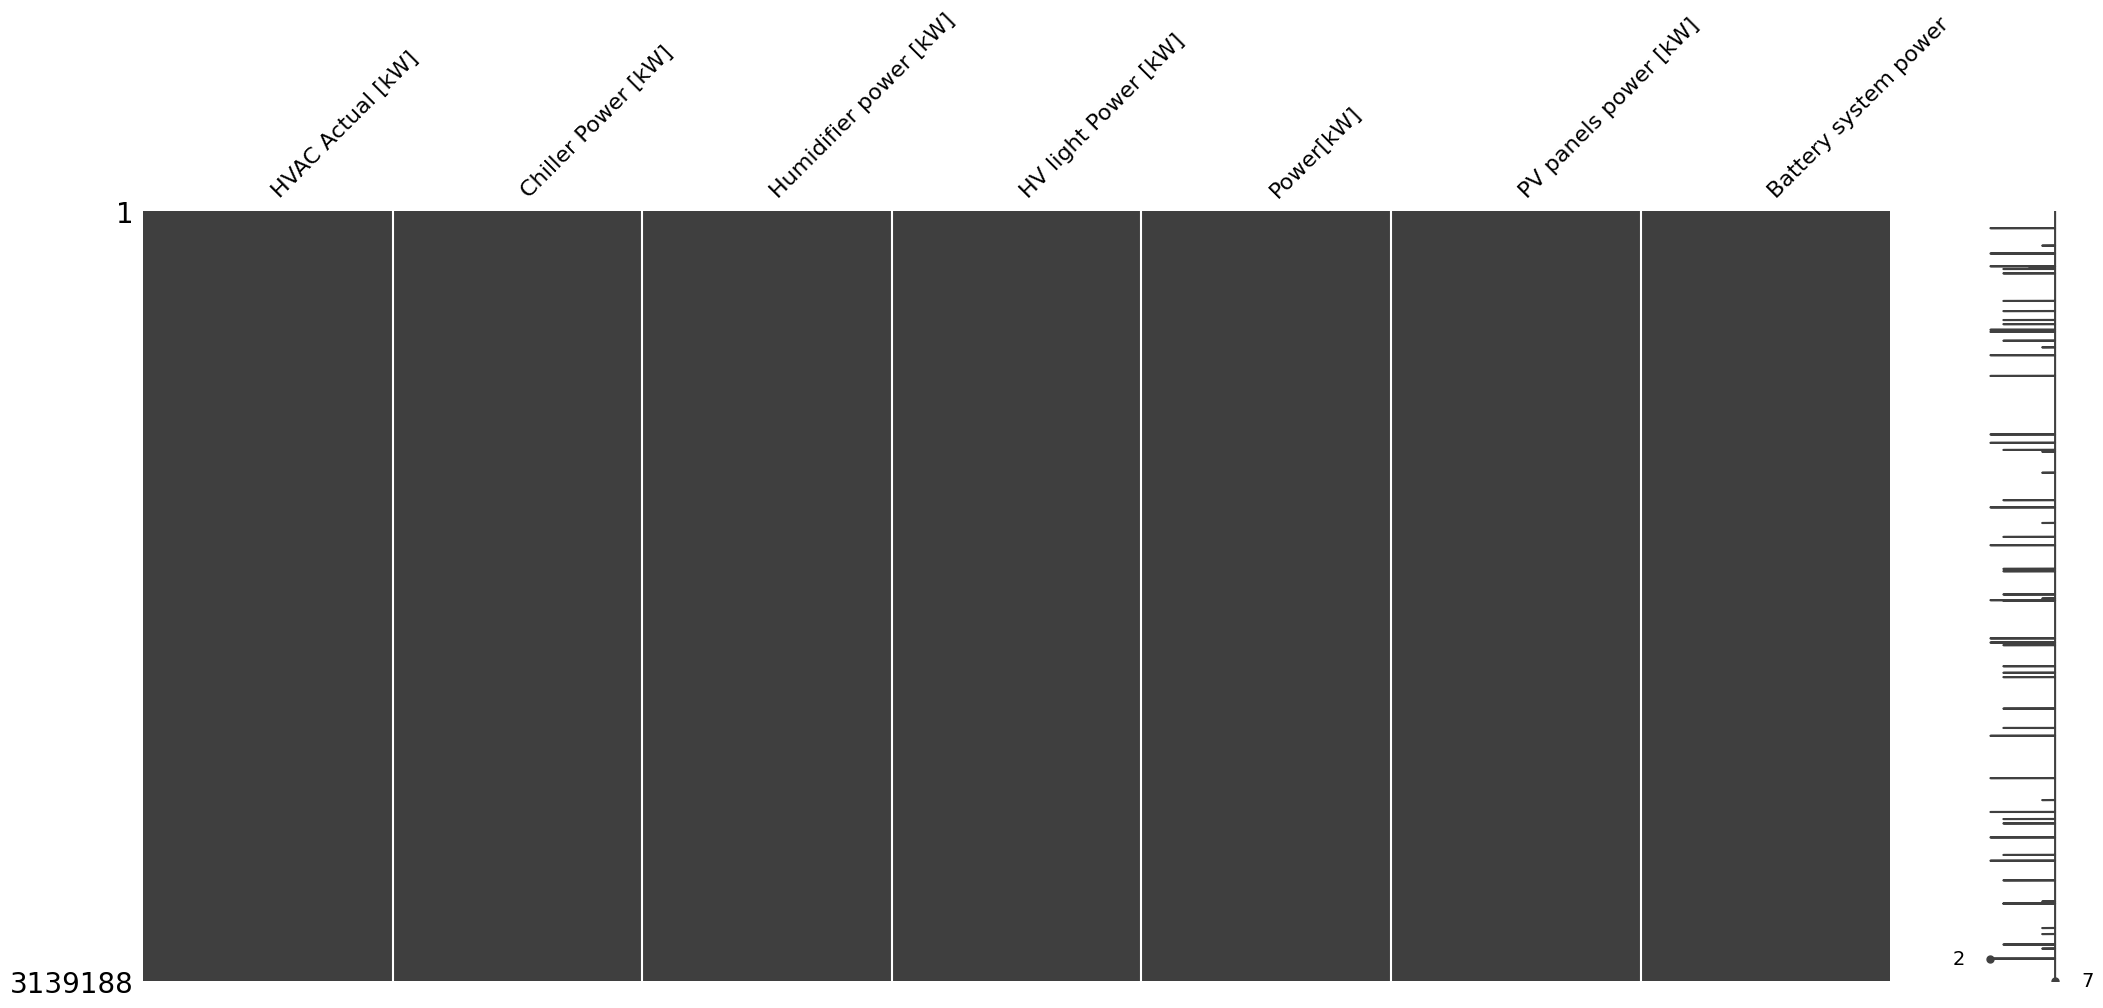

In [5]:
# Missingo on the raw data.
msno.matrix(building)

In [6]:
# Show info about the total missing data.
missing_data = building.isna().sum()

# To calculate the total number of missing values
total_missing = missing_data.sum()

# To calculate the percentage of missing values
percentage_missing = (total_missing / (building.shape[0] * building.shape[1])) * 100

print("Total Missing Values:", total_missing)
print("Percentage of Missing Values:", percentage_missing, "%")

Total Missing Values: 284
Percentage of Missing Values: 0.0012924179300962087 %


In [7]:
# Report on rows having maximum and minimum missing values.

max_missing_index = building.isna().sum(axis=1).idxmax()
min_missing_index = building.isna().sum(axis=1).idxmin()

print("Index with Maximum Missing Values:", max_missing_index)
print("Index with Minimum Missing Values:", min_missing_index)

max_missing_row = building.loc[max_missing_index]
min_missing_row = building.loc[min_missing_index]

print("\nRow with maximum missing values.")
print(max_missing_row)

print("\nRow with minimum missing values.")
print(min_missing_row)

# pd.set_option('display.float_format', '{:.5f}'.format)
# row_with_values = building[building.notna().all(axis=1)].iloc[2000]
# print(row_with_values)

Index with Maximum Missing Values: 2016-09-01 15:15:00
Index with Minimum Missing Values: 2016-01-01 00:00:00

Row with maximum missing values.
HVAC Actual [kW]            NaN
Chiller Power [kW]          NaN
Humidifier power [kW]       NaN
HV light Power [kW]         NaN
Power[kW]                   NaN
PV panels power [kW]    -12.203
Battery system power      0.246
Name: 2016-09-01 15:15:00, dtype: float64

Row with minimum missing values.
HVAC Actual [kW]         0.000
Chiller Power [kW]       0.000
Humidifier power [kW]    0.000
HV light Power [kW]      0.001
Power[kW]                0.020
PV panels power [kW]     0.000
Battery system power     0.000
Name: 2016-01-01 00:00:00, dtype: float64


<Axes: >

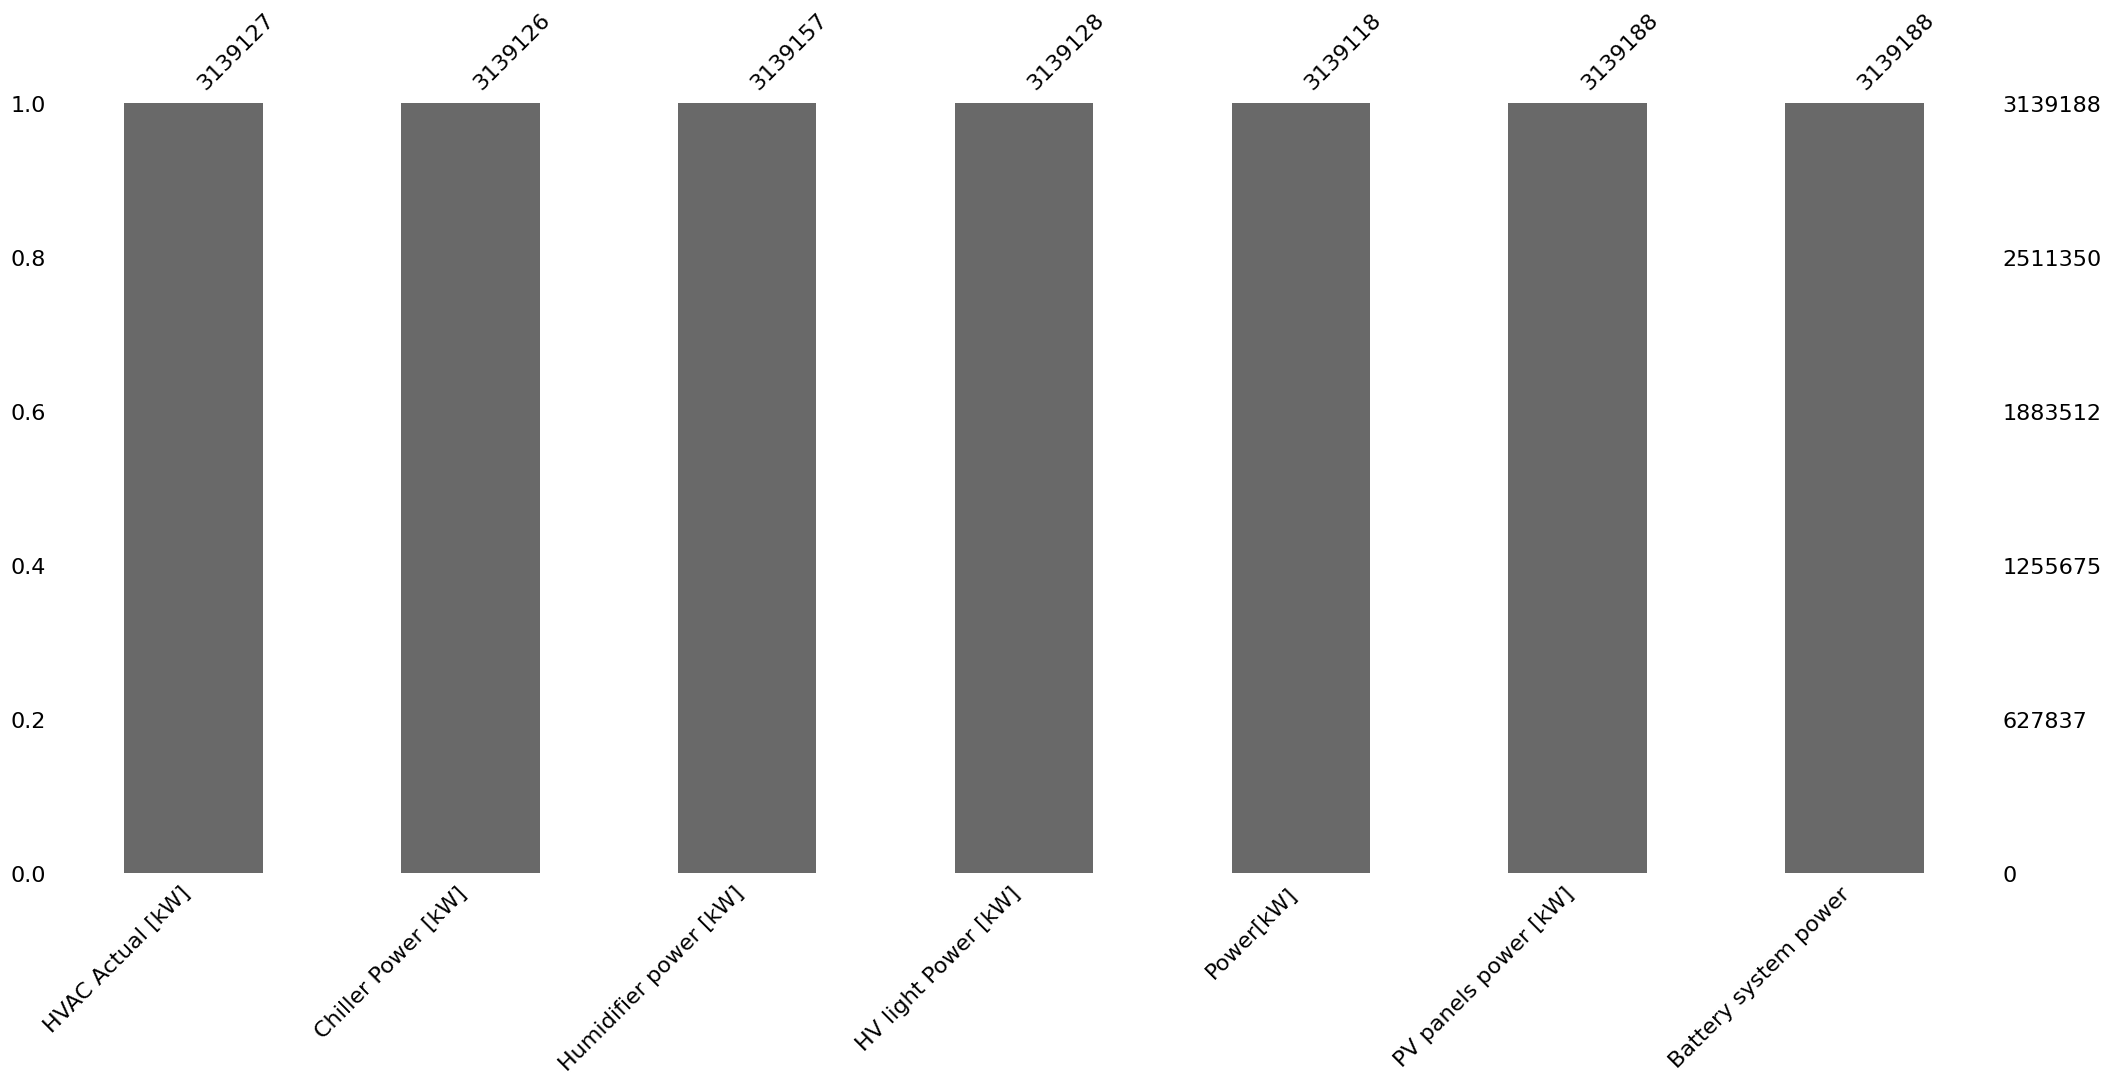

In [8]:
msno.bar(building)

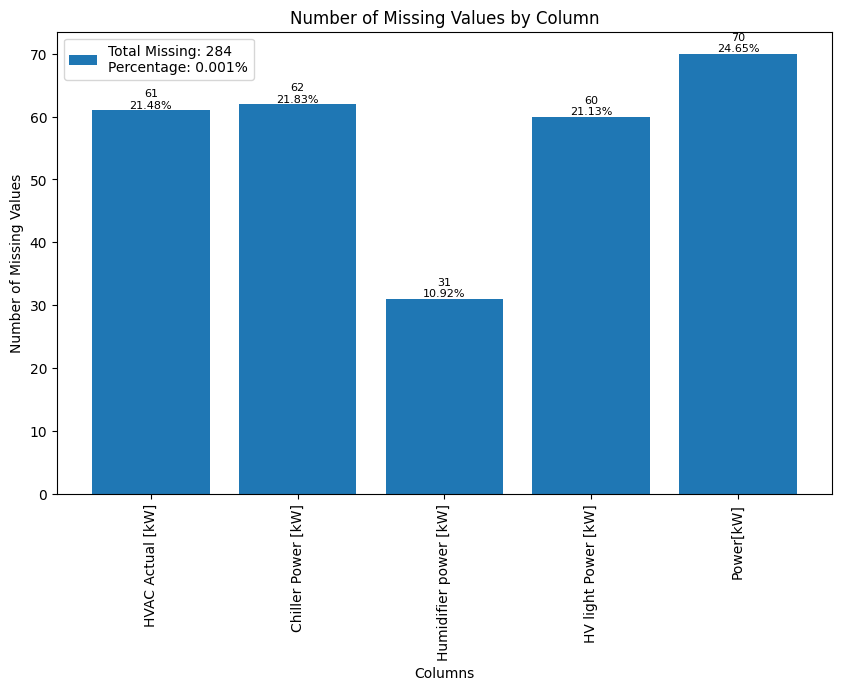

In [9]:
# Show the missing data on each column.

# Assuming 'building' is your DataFrame
missing_data = building.isna().sum()

# Filter out columns with zero missing values
missing_data = missing_data[missing_data > 0]

# Calculate the total number of missing values
total_missing = missing_data.sum()

# Calculate the percentage of missing values
percentage_missing = (total_missing / (building.shape[0] * building.shape[1])) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_data.index, missing_data)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values by Column')
plt.xticks(rotation=90)

# Add percentages on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}\n{yval/total_missing*100:.2f}%', ha='center', va='bottom', color='black', fontsize=8)

# Add legend for total missing and percentage
legend_text = f'Total Missing: {total_missing}\nPercentage: {percentage_missing:.3f}%'
plt.legend([legend_text])

plt.show()


In [10]:
# Report on columns having maximum and minimum missing values.

max_missing_index = building.isna().sum(axis=0).idxmax()
min_missing_index = building.isna().sum(axis=0).idxmin()

print("Index with Maximum Missing Values:", max_missing_index)
print("Index with Minimum Missing Values:", min_missing_index)

Index with Maximum Missing Values: Power[kW]
Index with Minimum Missing Values: PV panels power [kW]


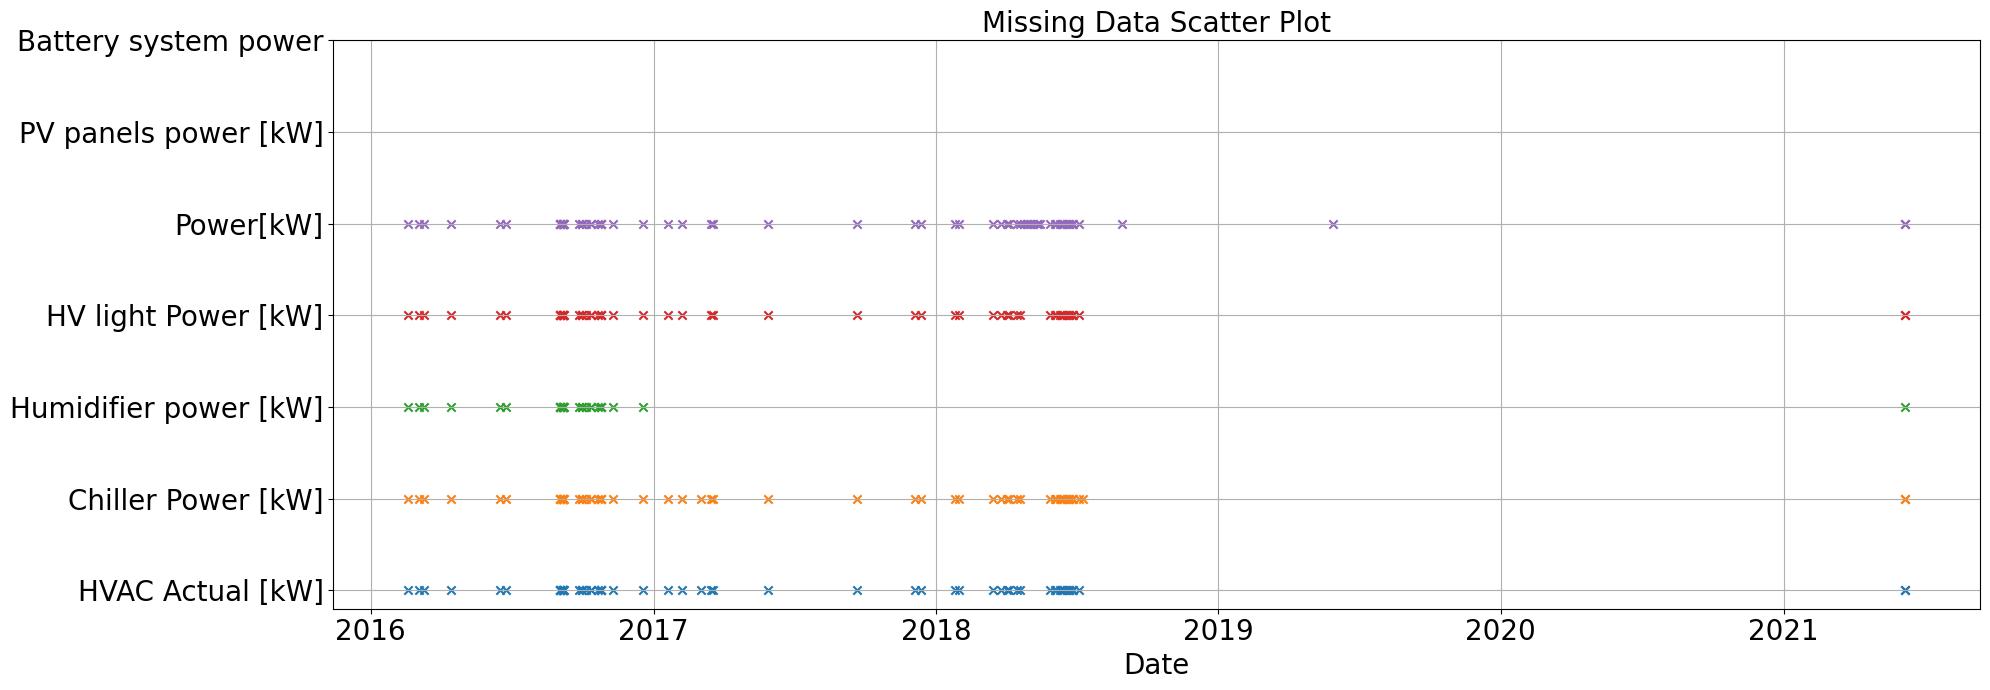

In [11]:
# Plot scatter of the missing data
# Create a scatter plot for missing data
plt.figure(figsize=(20, 7))  # Set the figure size (optional)

# Iterate through each column
for col in building.columns:
    missing_data = building[col].isnull()
    if missing_data.any():  # Check if column has any missing values
        plt.scatter(building.index[missing_data], [col] * missing_data.sum(), marker='x', label=col)

size = 20
plt.xlabel('Date', fontsize=size)
plt.yticks(range(len(building.columns)), building.columns, fontsize=size)
plt.xticks(fontsize=size)
plt.title('Missing Data Scatter Plot', fontsize=size)
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

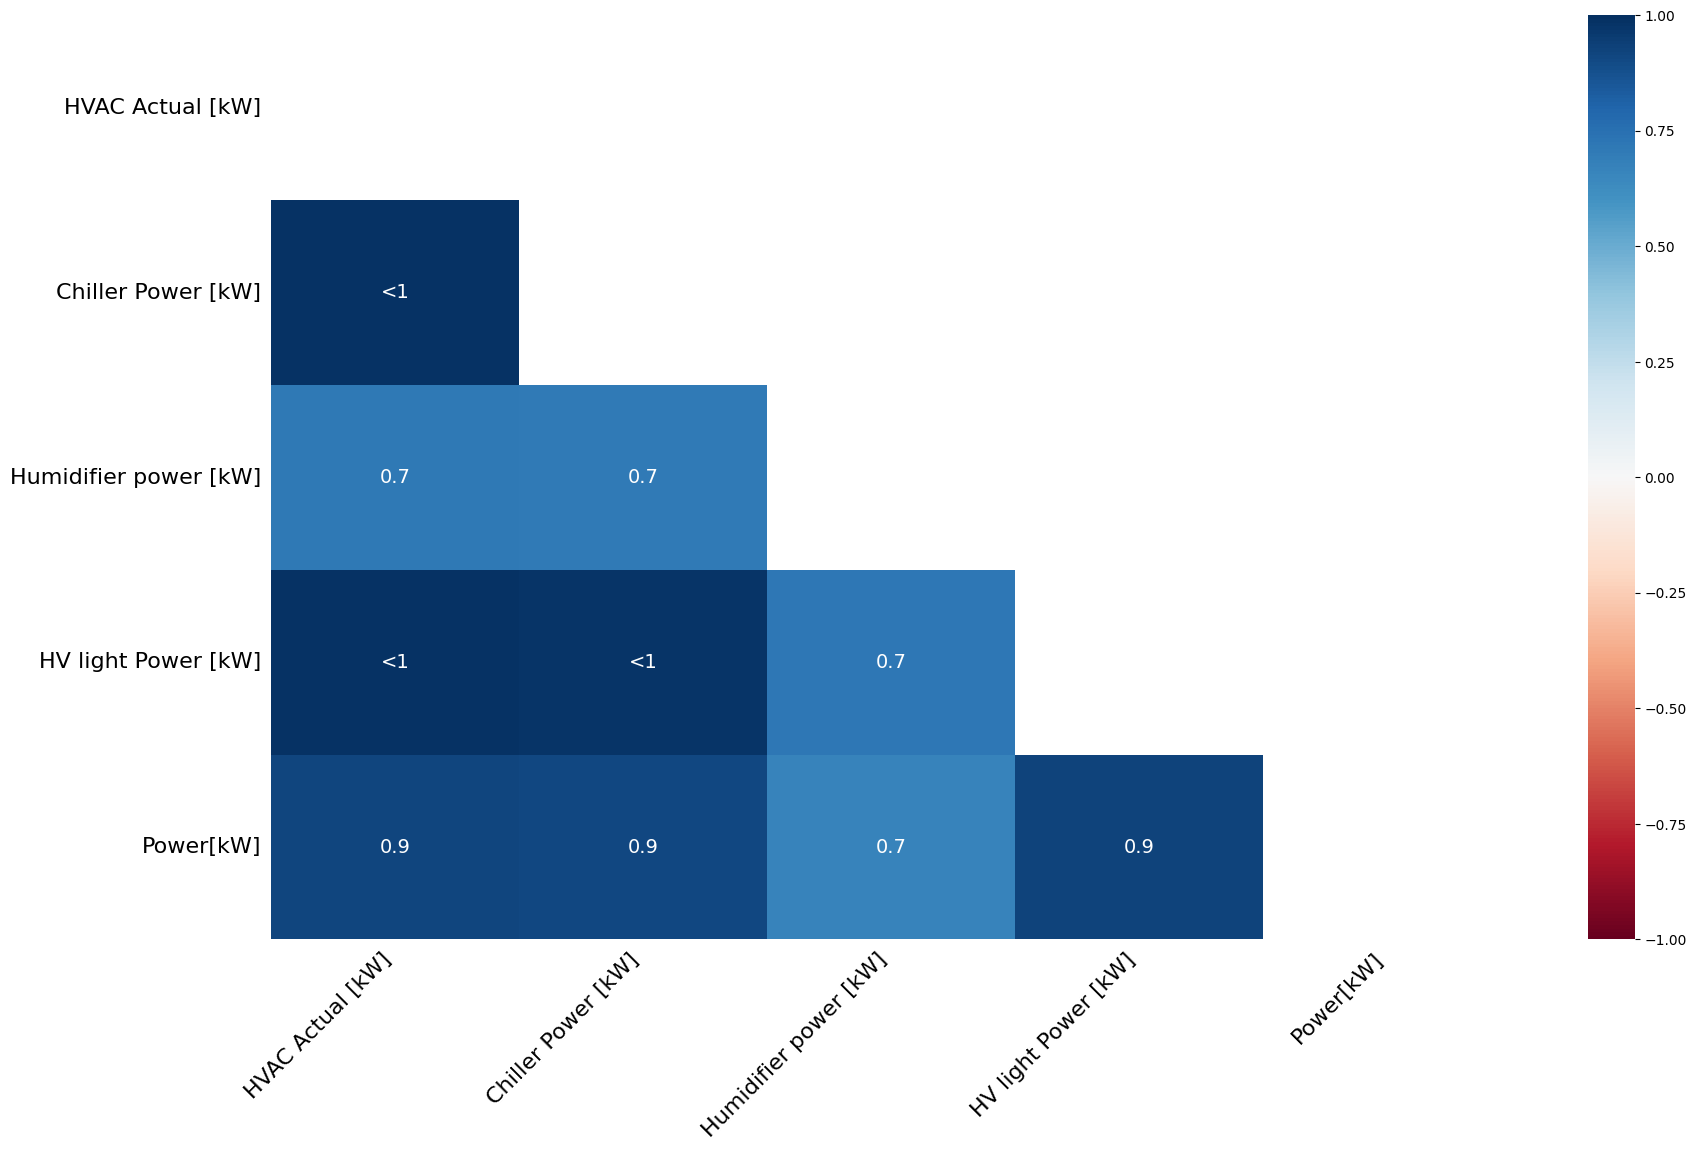

In [12]:
msno.heatmap(building)

<Axes: >

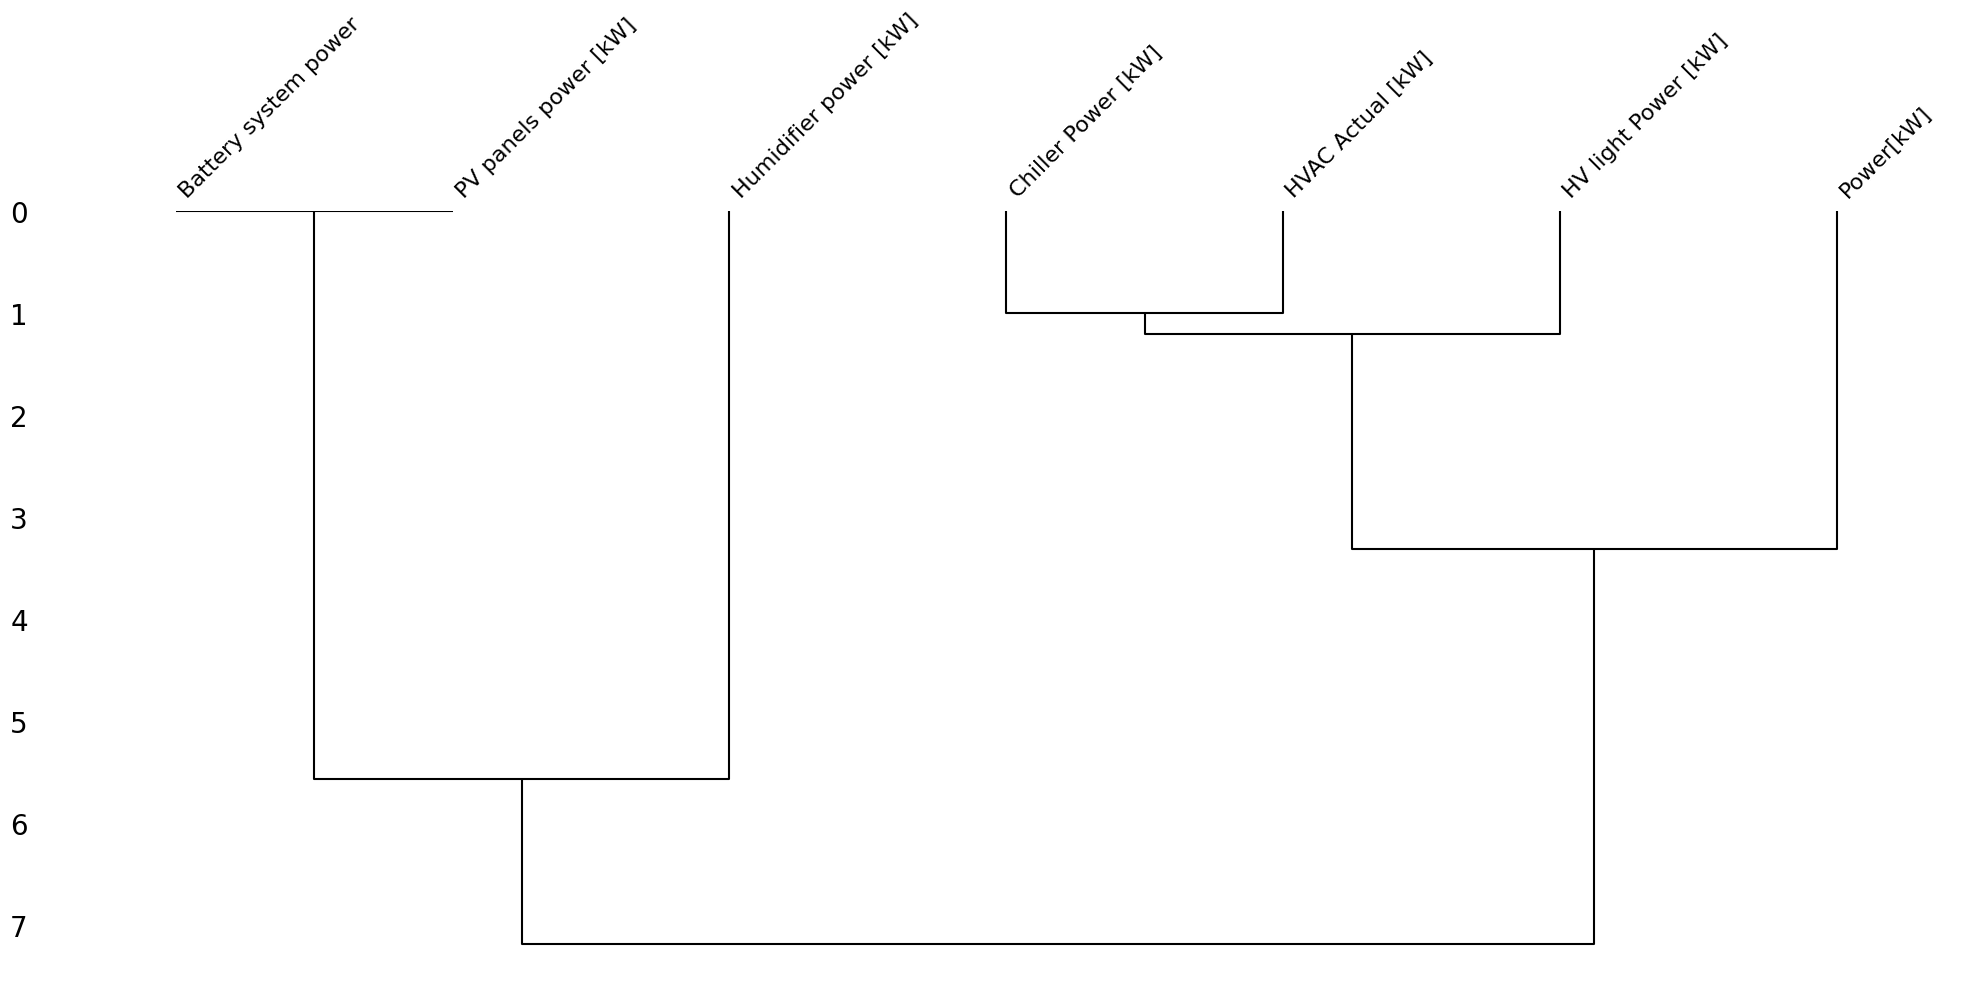

In [13]:
msno.dendrogram(building)

In [14]:
# Select rows where either 'feature1' or 'feature2' contains NaN values, 'HV light Power [kW], Power[kW]'
nan_rows = building[building[['Chiller Power [kW]', 'HVAC Actual [kW]', 'HV light Power [kW]', 'Power[kW]']].isna().all(axis=1)]

# Get the Datetime values for these rows
nan_dates = nan_rows.index
print(len(nan_dates))

# Print the Datetime values with missing values
print("Datetime values with missing values in either feature1 or feature2:")
print(nan_dates)

60
Datetime values with missing values in either feature1 or feature2:
DatetimeIndex(['2016-09-01 15:15:00', '2016-09-02 10:00:00',
               '2016-09-02 10:55:00', '2016-09-02 10:59:00',
               '2016-03-03 13:11:00', '2018-04-03 08:32:00',
               '2018-06-03 16:10:00', '2018-07-04 19:24:00',
               '2017-12-04 11:29:00', '2018-04-05 19:09:00',
               '2018-06-05 11:58:00', '2016-09-05 09:20:00',
               '2016-09-05 09:32:00', '2016-09-05 14:32:00',
               '2016-09-05 14:37:00', '2016-09-05 14:42:00',
               '2016-10-05 09:10:00', '2017-02-06 10:46:00',
               '2016-09-06 10:28:00', '2016-09-06 14:36:00',
               '2021-06-07 04:04:00', '2021-06-07 04:05:00',
               '2016-11-09 19:41:00', '2016-03-10 13:27:00',
               '2018-06-10 16:44:00', '2018-06-12 21:31:00',
               '2016-10-12 08:28:00', '2016-10-12 08:31:00',
               '2017-12-13 01:49:00', '2016-04-14 13:22:00',
              

In [15]:
building_linearly_interpolated = building.interpolate(method='linear')

row_before_interpolation = building.loc['2016-09-01 15:15:00']
row_after_interpolation = building_linearly_interpolated.loc['2016-09-01 15:15:00']

# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame({'Before Interpolation': row_before_interpolation, 
                              'After Interpolation': row_after_interpolation})

# Display the comparison table
print(comparison_df)

row_before_interpolation = building.loc['2018-06-05 11:58:00']
row_after_interpolation = building_linearly_interpolated.loc['2018-06-05 11:58:00']

# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame({'Before Interpolation': row_before_interpolation, 
                              'After Interpolation': row_after_interpolation})

# Display the comparison table
print(comparison_df)

                       Before Interpolation  After Interpolation
HVAC Actual [kW]                        NaN               4.5275
Chiller Power [kW]                      NaN               3.9585
Humidifier power [kW]                   NaN               0.0080
HV light Power [kW]                     NaN               6.9120
Power[kW]                               NaN              -0.0350
PV panels power [kW]                -12.203             -12.2030
Battery system power                  0.246               0.2460
                       Before Interpolation  After Interpolation
HVAC Actual [kW]                        NaN               5.8655
Chiller Power [kW]                      NaN               0.1440
Humidifier power [kW]                 0.010               0.0100
HV light Power [kW]                     NaN               7.7265
Power[kW]                               NaN               8.2150
PV panels power [kW]                 -1.879              -1.8790
Battery system power     

Total Missing Values: 0
Percentage of Missing Values: 0.0 %


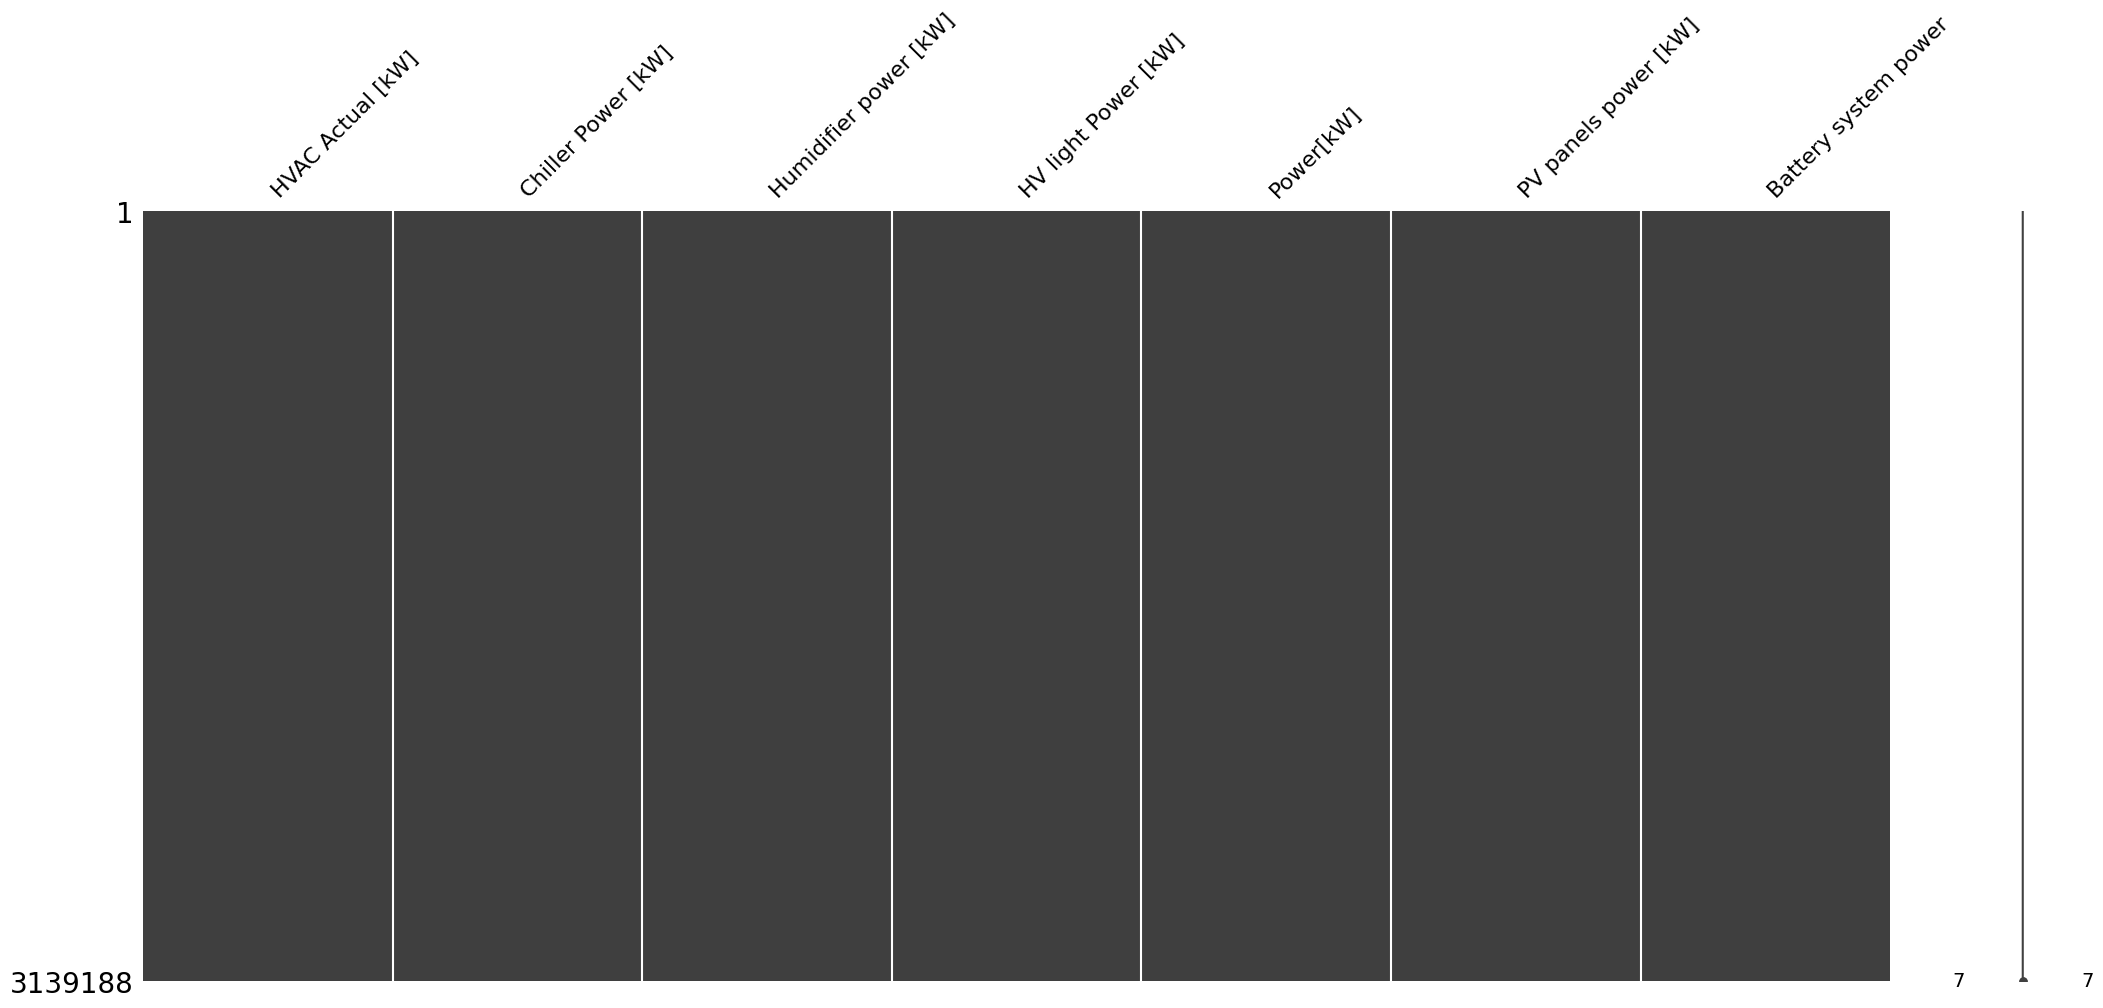

In [16]:
msno.matrix(building_linearly_interpolated)

# Show info about the total missing data on linearly interpolated data.
missing_data = building_linearly_interpolated.isna().sum()

# To calculate the total number of missing values
total_missing = missing_data.sum()

# To calculate the percentage of missing values
percentage_missing = (total_missing / (building_linearly_interpolated.shape[0] * building_linearly_interpolated.shape[1])) * 100

print("Total Missing Values:", total_missing)
print("Percentage of Missing Values:", percentage_missing, "%")

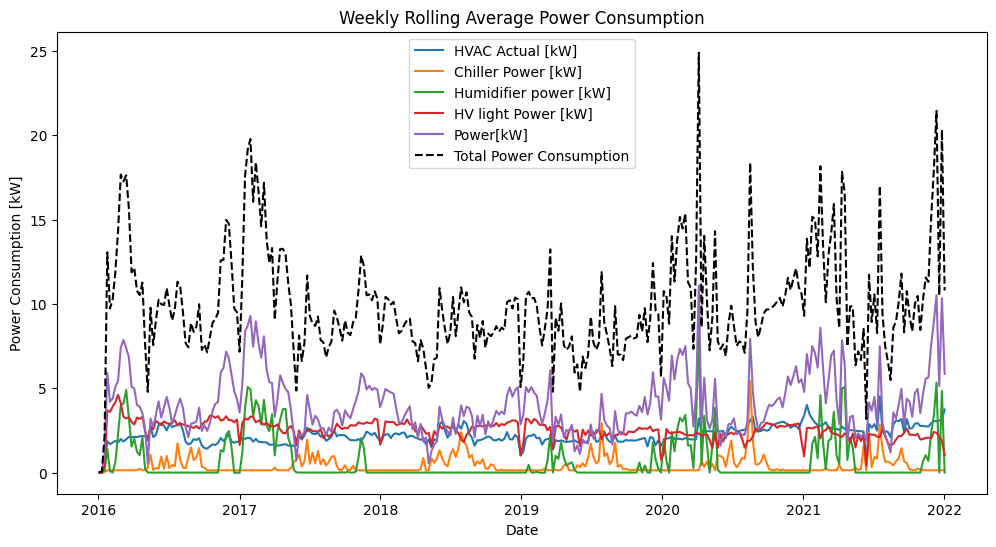

In [17]:
# Weekly line plot.

columns_to_plot = ['HVAC Actual [kW]', 'Chiller Power [kW]', 'Humidifier power [kW]', 'HV light Power [kW]', 'Power[kW]']

# Calculate the weekly rolling averages for each column
weekly_avg = building_linearly_interpolated[columns_to_plot].resample('W').mean()

# Calculate the sum of the power consumption values for each week
weekly_sum = weekly_avg.sum(axis=1)

# Plot the weekly rolling averages
plt.figure(figsize=(12, 6))

for col in columns_to_plot:
    plt.plot(weekly_avg.index, weekly_avg[col], label=col)

# Add a line for the sum
plt.plot(weekly_avg.index, weekly_sum, label='Total Power Consumption', color='black', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Power Consumption [kW]')
plt.title('Weekly Rolling Average Power Consumption')
plt.legend()
plt.show()

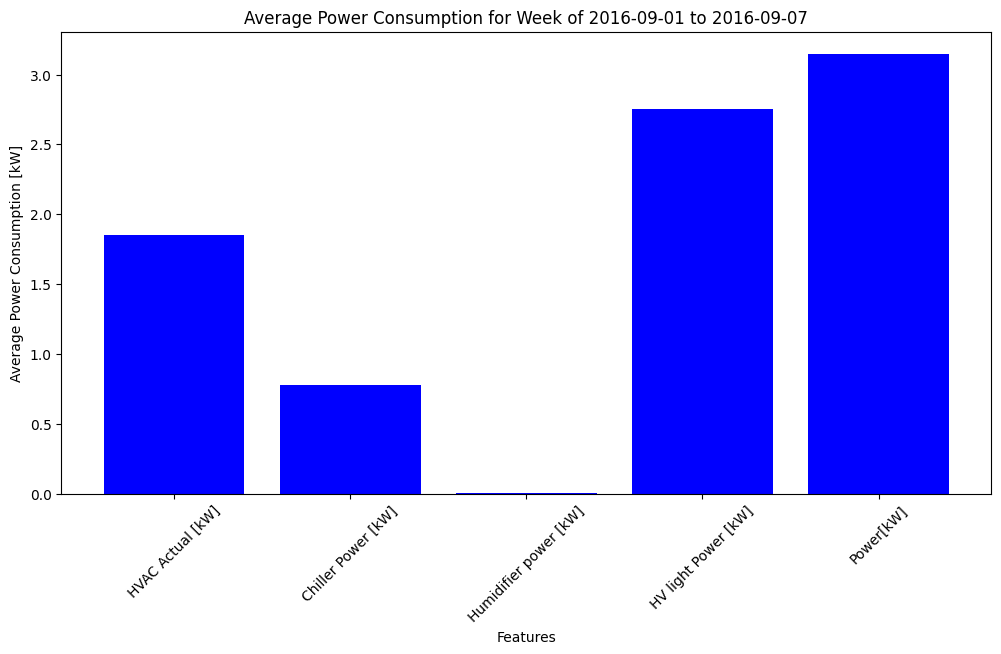

In [18]:
# Weekly bar chart.

# Define the time period (e.g., a specific week)
start_date = '2016-09-01'
end_date = '2016-09-07'

# Filter the data for the specified time period
period_data = building_linearly_interpolated.loc[start_date:end_date]

# Define the columns to plot
columns_to_plot = ['HVAC Actual [kW]', 'Chiller Power [kW]', 'Humidifier power [kW]', 'HV light Power [kW]', 'Power[kW]']

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(columns_to_plot, period_data[columns_to_plot].mean(), color='blue')
plt.xlabel('Features')
plt.ylabel('Average Power Consumption [kW]')
plt.title(f'Average Power Consumption for Week of {start_date} to {end_date}')
plt.xticks(rotation=45)
plt.show()

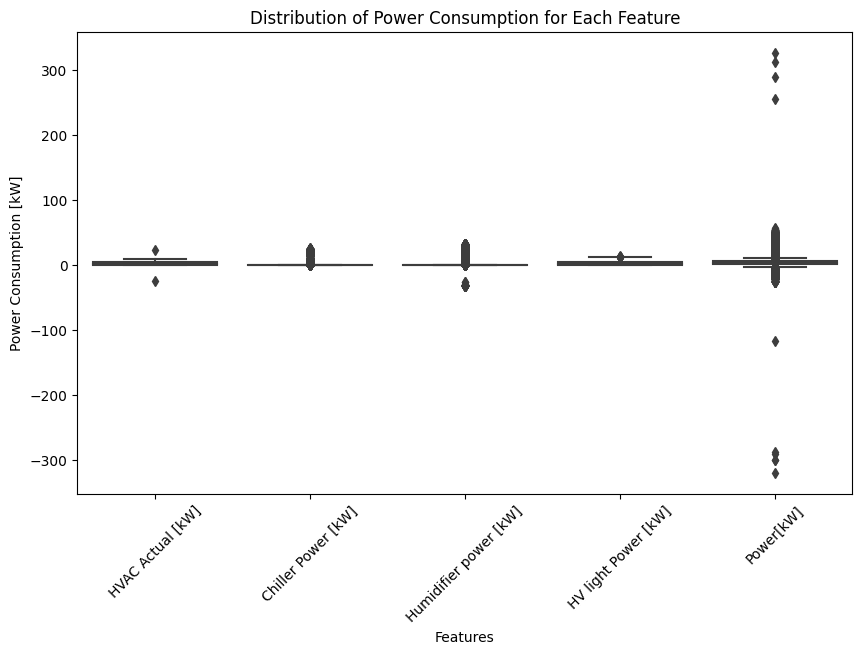

In [19]:
# Weekly box plot.

# Define the columns to plot
columns_to_plot = ['HVAC Actual [kW]', 'Chiller Power [kW]', 'Humidifier power [kW]', 'HV light Power [kW]', 'Power[kW]']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=building_linearly_interpolated[columns_to_plot])
plt.xlabel('Features')
plt.ylabel('Power Consumption [kW]')
plt.title('Distribution of Power Consumption for Each Feature')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Define the columns representing energy consumption
energy_columns = ['HVAC Actual [kW]', 'Chiller Power [kW]', 'Humidifier power [kW]', 'HV light Power [kW]', 'Power[kW]']

# Resample data by week and calculate the range
weekly_range = building_linearly_interpolated[energy_columns].resample('W').apply(lambda x: x.max() - x.min())

# Print the range of energy consumption per week
print(weekly_range)

            HVAC Actual [kW]  Chiller Power [kW]  Humidifier power [kW]  \
Time                                                                      
2016-01-03             0.005               0.000                  0.000   
2016-01-10             0.005               0.000                  0.025   
2016-01-17             8.228               0.148                 14.552   
2016-01-24             5.437               0.014                 19.591   
2016-01-31             5.456               0.012                 20.172   
...                      ...                 ...                    ...   
2021-12-05             7.797               0.010                 21.920   
2021-12-12             7.231               0.011                 24.881   
2021-12-19             8.755               0.013                  0.025   
2021-12-26             7.548               0.126                 64.960   
2022-01-02             6.655               0.010                  0.016   

            HV light Pow

In [31]:
# Calculate the yearly consumption for each component
yearly_hvac = building_linearly_interpolated['HVAC Actual [kW]'].resample('Y').sum()
yearly_chiller = building_linearly_interpolated['Chiller Power [kW]'].resample('Y').sum()
yearly_humidifier = building_linearly_interpolated['Humidifier power [kW]'].resample('Y').sum()
yearly_hv_light = building_linearly_interpolated['HV light Power [kW]'].resample('Y').sum()

# Calculate the total Power [kW] for each year
yearly_total_power = building_linearly_interpolated['Power[kW]'].resample('Y').sum()

# Compare the total Power [kW] with the sum of components
for year in yearly_hvac.index:
    total_power_year = yearly_total_power.loc[year]
    components_sum = (
        yearly_hvac.loc[year] +
        yearly_chiller.loc[year] +
        yearly_humidifier.loc[year] +
        yearly_hv_light.loc[year]
    )
    print(f'Year {year.year}:')
    print(f'Total Power [kW]: {total_power_year:.2f}')
    print(f'Sum of Components: {components_sum:.2f}')
    print(f'Difference: {total_power_year - components_sum:.2f}\n')

Year 2016:
Total Power [kW]: 2140607.39
Sum of Components: 3182086.59
Difference: -1041479.20

Year 2017:
Total Power [kW]: 2380048.84
Sum of Components: 3308041.86
Difference: -927993.02

Year 2018:
Total Power [kW]: 1711865.87
Sum of Components: 2806246.60
Difference: -1094380.73

Year 2019:
Total Power [kW]: 1732205.54
Sum of Components: 2674774.35
Difference: -942568.81

Year 2020:
Total Power [kW]: 2320225.29
Sum of Components: 3294910.71
Difference: -974685.42

Year 2021:
Total Power [kW]: 2494587.22
Sum of Components: 3328476.63
Difference: -833889.41



In [45]:
#resample the data by daily
building_day = building_linearly_interpolated.resample('D').sum()

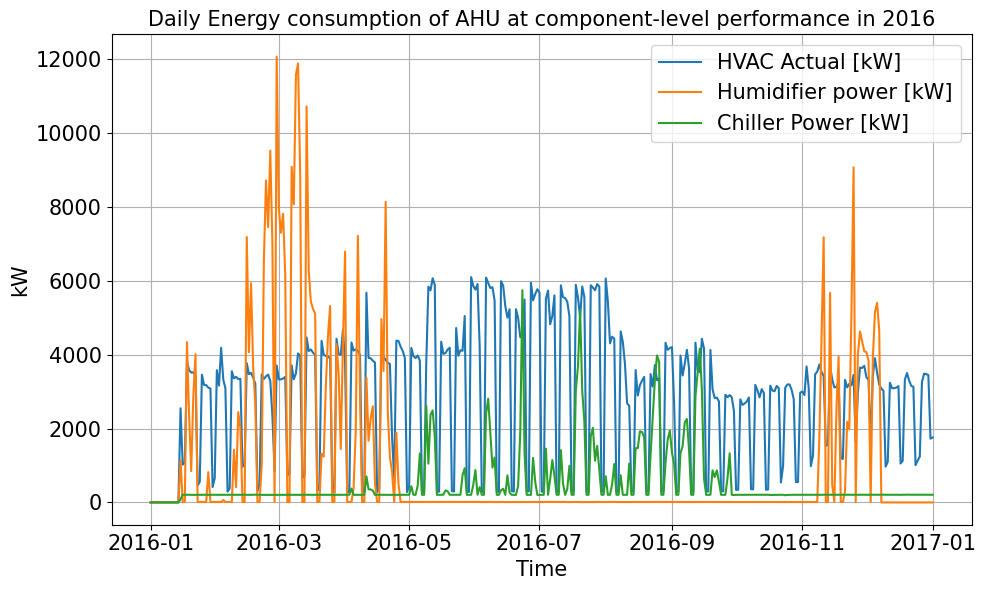

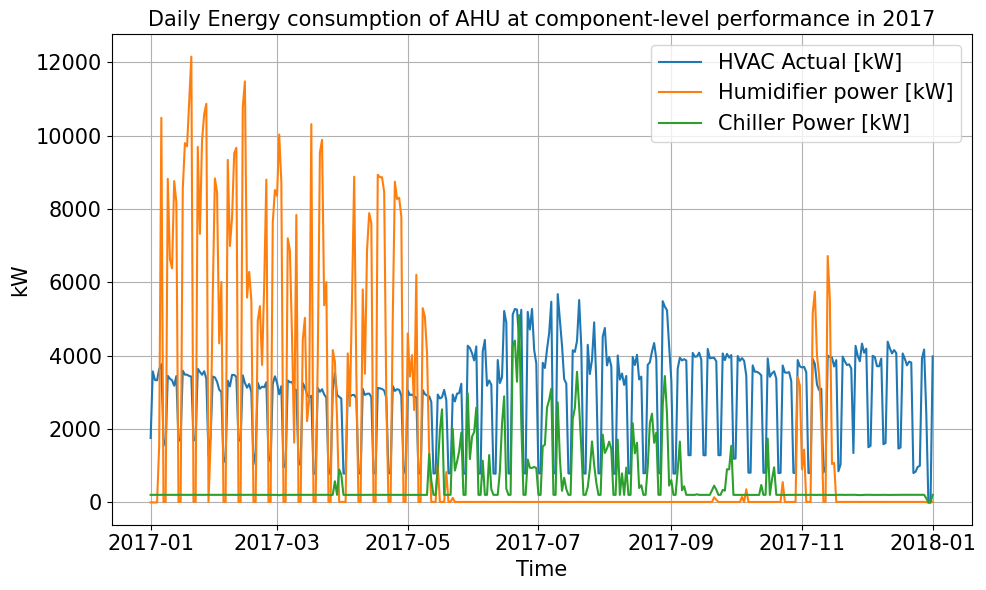

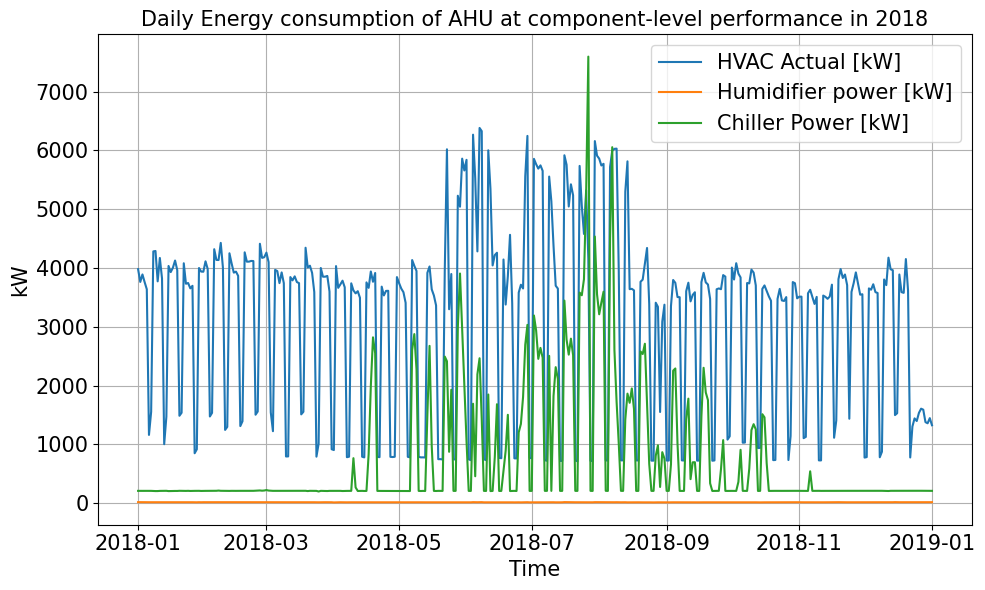

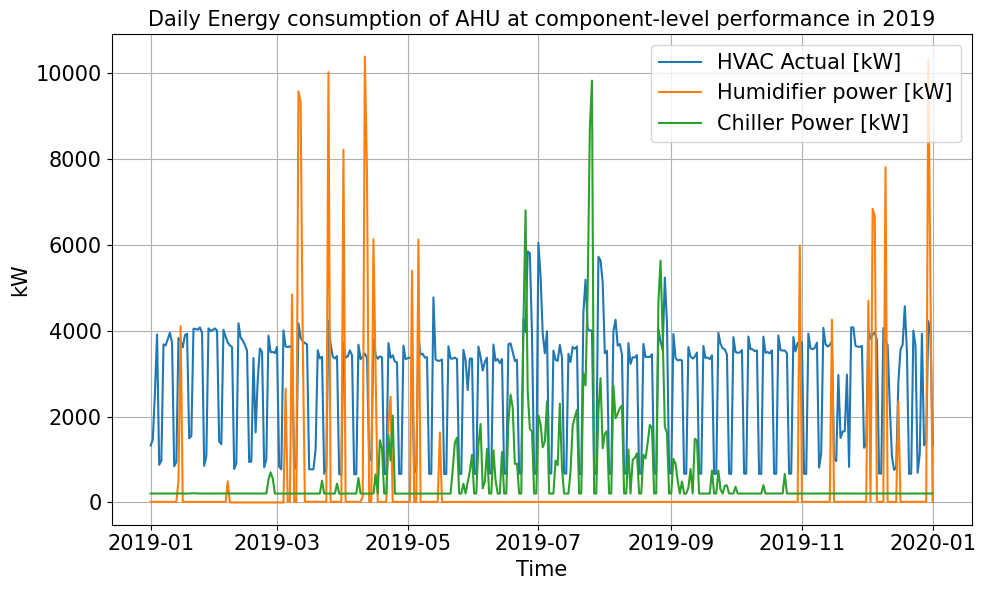

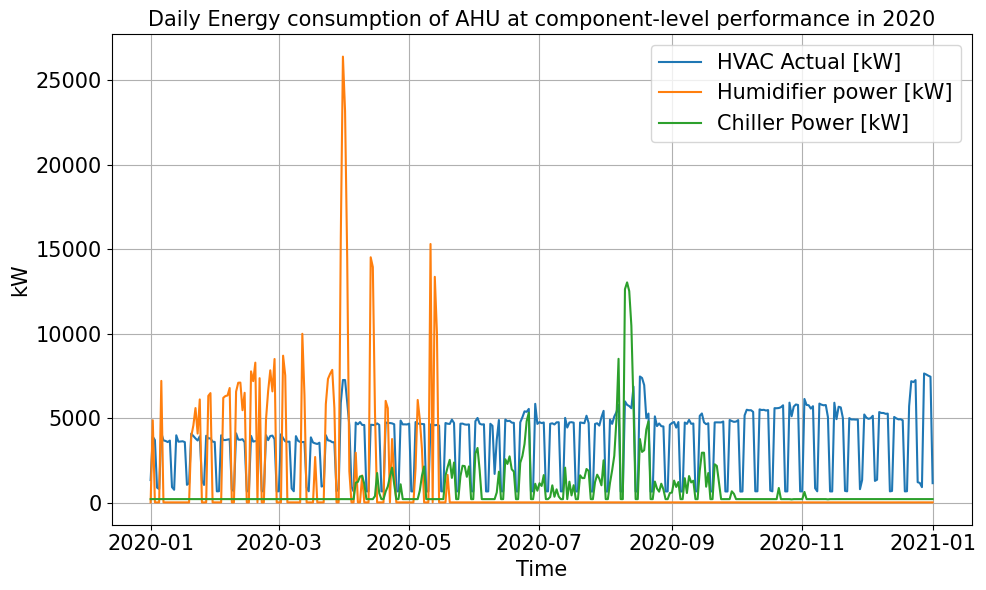

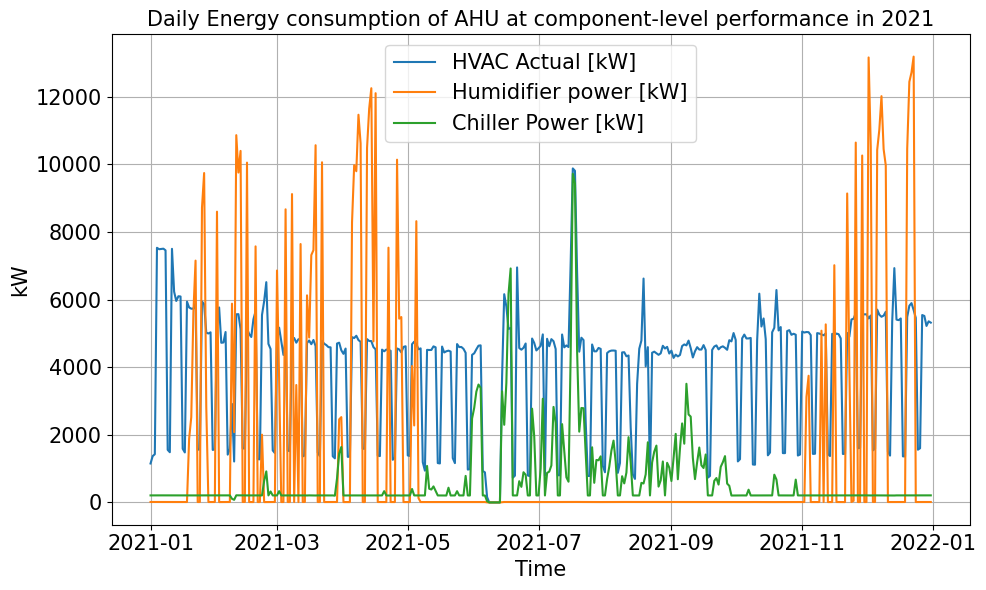

In [46]:
# Loop over the selected years (from 2016 to 2021)
for select_year in range(2016, 2022):
    start_time = pd.to_datetime(f'{select_year}-1-1')
    end_time = pd.to_datetime(f'{select_year+1}-1-1')

    building_year_select = building_day.loc[start_time:end_time]

    # Extract data of AHU
    AHU_level_data = building_year_select[['HVAC Actual [kW]', 'Humidifier power [kW]', 'Chiller Power [kW]']]

    # Plot the energy consumption of AHU in a line chart
    plt.figure(figsize=(10, 6))

    for col in AHU_level_data.columns:
        plt.plot(AHU_level_data.index, AHU_level_data[col], label=col)

    plt.title(f'Daily Energy consumption of AHU at component-level performance in {select_year}', fontsize=fontsize)
    plt.xlabel('Time', fontsize=fontsize)
    plt.ylabel('kW', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize)

    plt.tight_layout()
    plt.grid()

    plt.show()


/tmp/ipykernel_32/1848847363.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COP_data.loc[:,'COP_Cooling'] = COP_data['Chiller Power [kW]']/ COP_data['HVAC Actual [kW]']


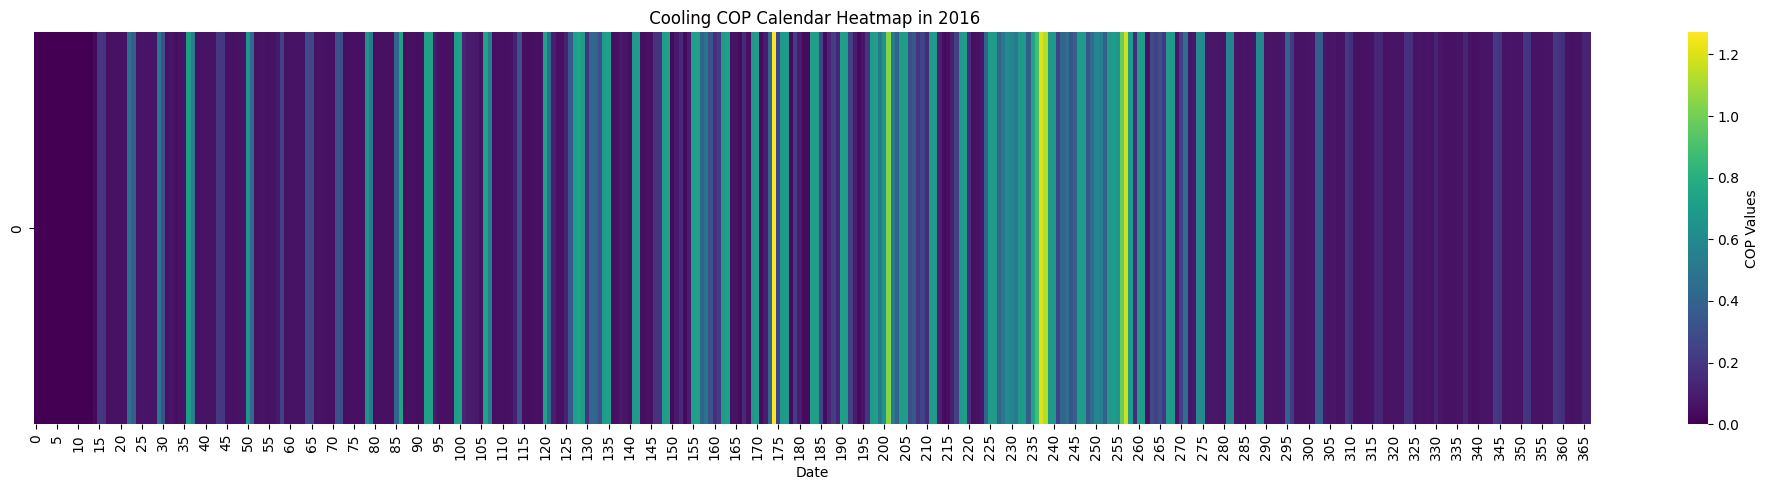

/tmp/ipykernel_32/1848847363.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COP_data.loc[:,'COP_Cooling'] = COP_data['Chiller Power [kW]']/ COP_data['HVAC Actual [kW]']


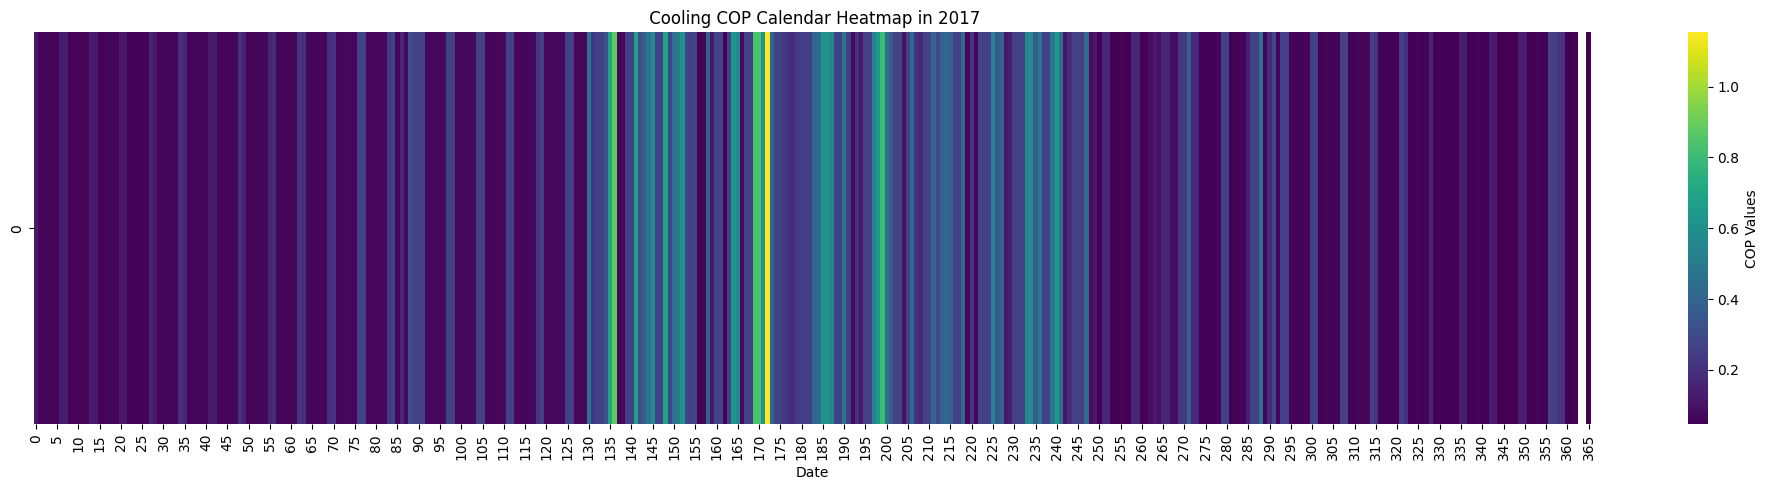

/tmp/ipykernel_32/1848847363.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COP_data.loc[:,'COP_Cooling'] = COP_data['Chiller Power [kW]']/ COP_data['HVAC Actual [kW]']


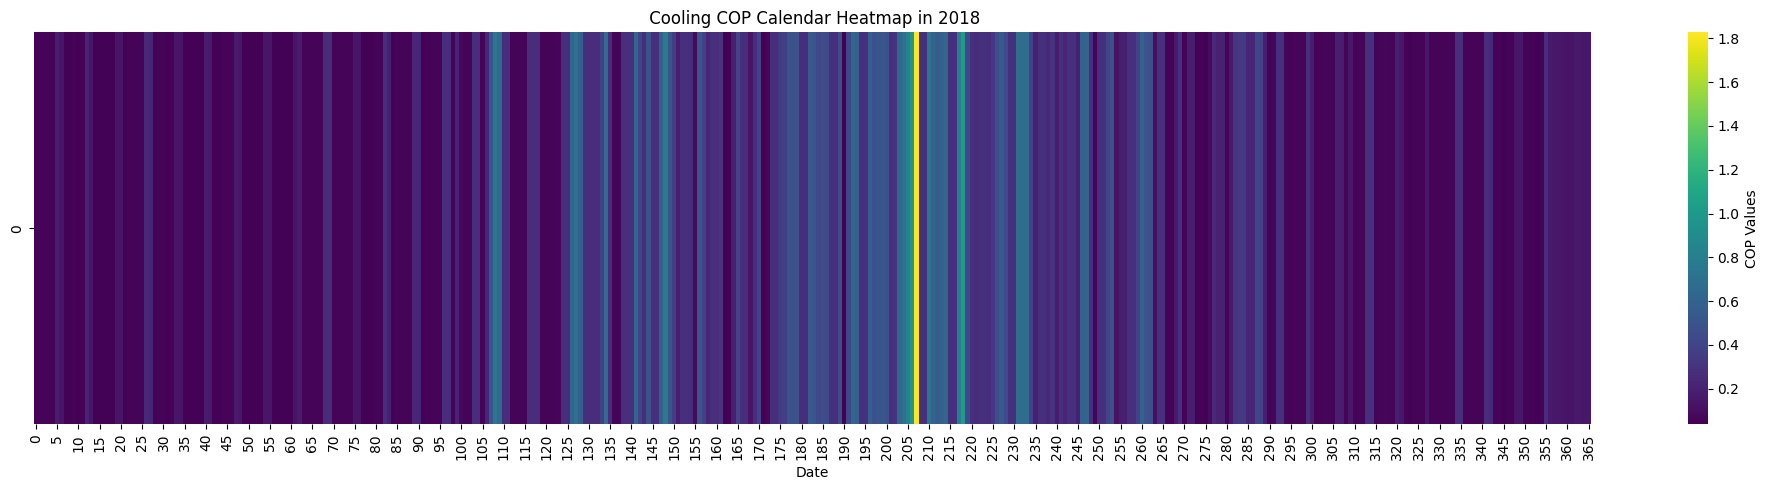

/tmp/ipykernel_32/1848847363.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COP_data.loc[:,'COP_Cooling'] = COP_data['Chiller Power [kW]']/ COP_data['HVAC Actual [kW]']


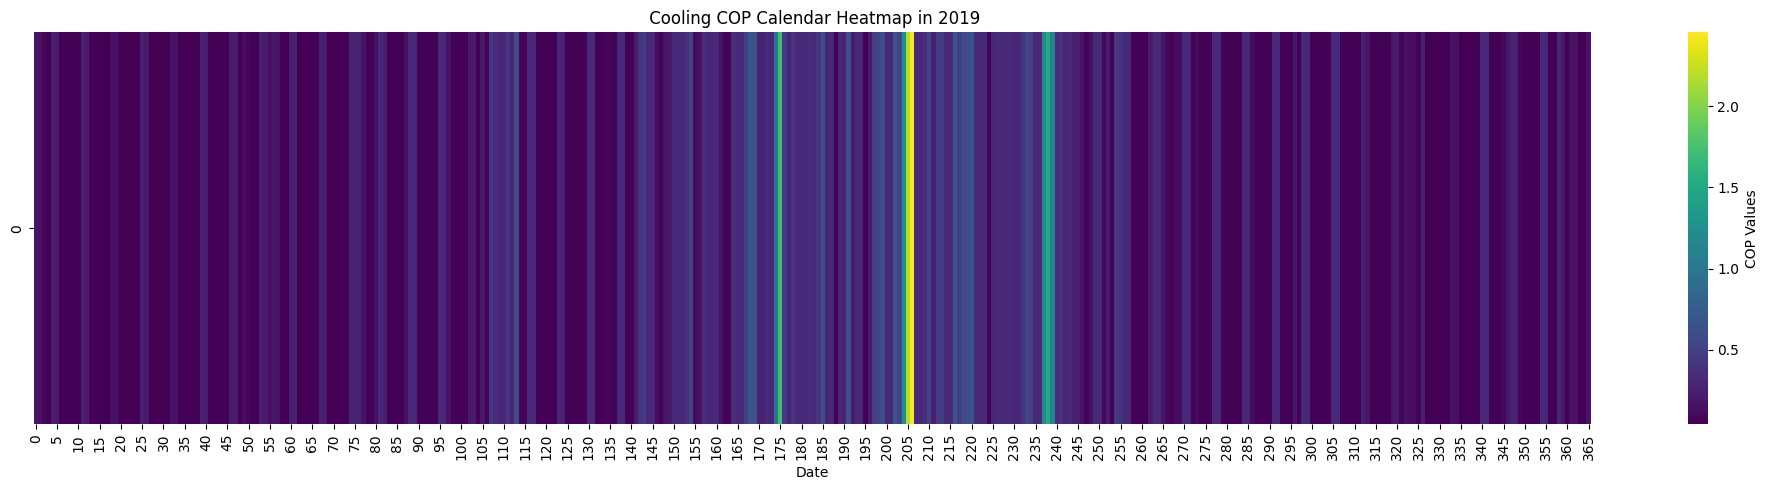

/tmp/ipykernel_32/1848847363.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COP_data.loc[:,'COP_Cooling'] = COP_data['Chiller Power [kW]']/ COP_data['HVAC Actual [kW]']


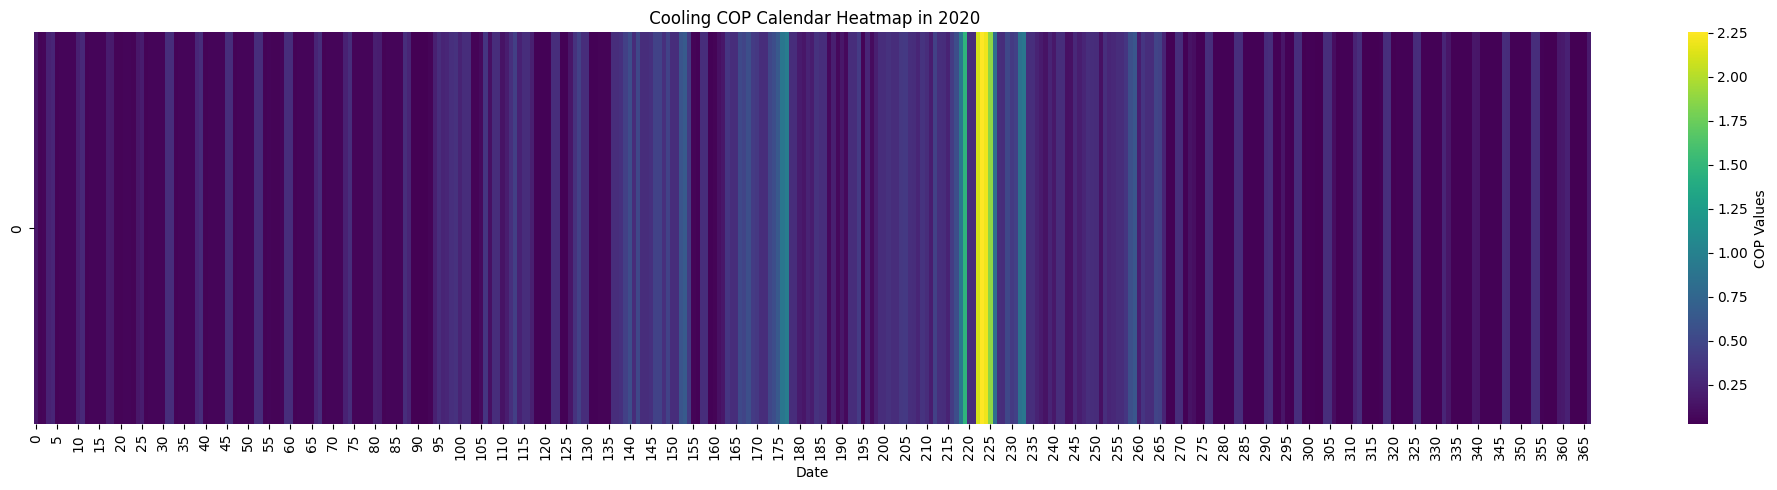

/tmp/ipykernel_32/1848847363.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COP_data.loc[:,'COP_Cooling'] = COP_data['Chiller Power [kW]']/ COP_data['HVAC Actual [kW]']


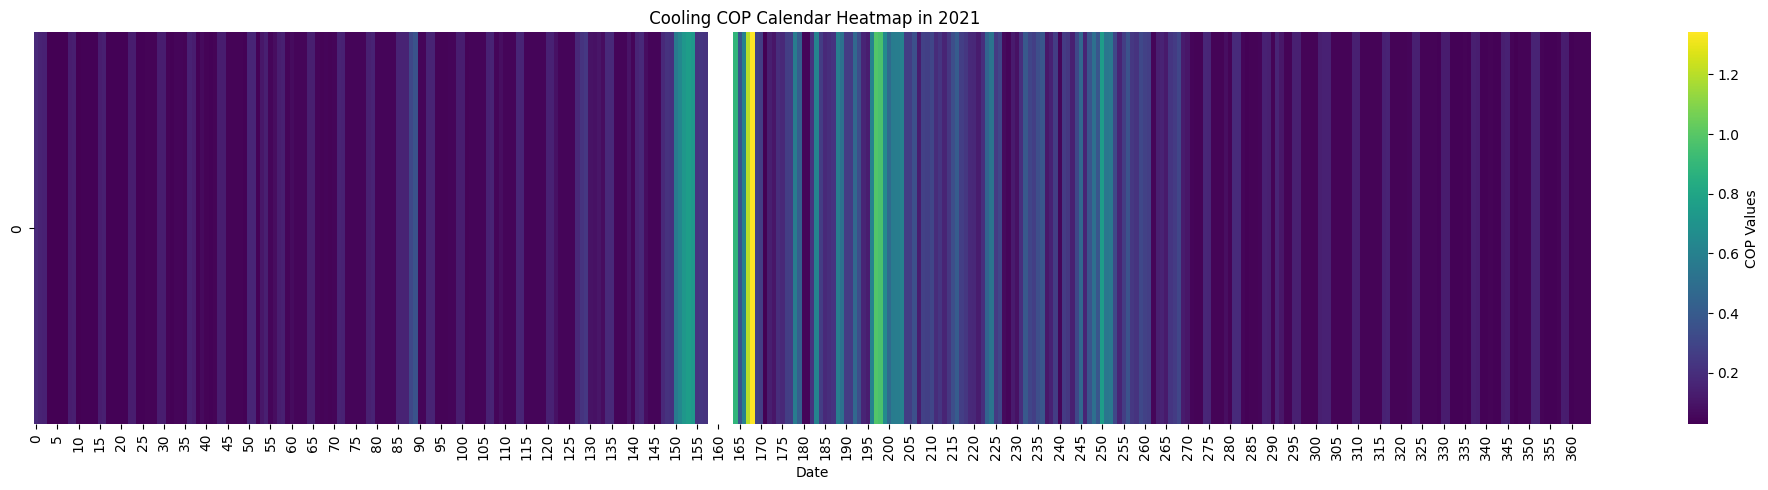

In [47]:
#Calculating Coefficient of Performance (COP) based on assumption data
#assume that cooling capacity is Chiller Power [kW] and power consumption of the AHU is HVAC Actual [kW]
# 'Chiller Power [kW]','HVAC Actual [kW]'
#extract data from two columns
for select_year in range(2016, 2022):
    start_time = pd.to_datetime(f'{select_year}-1-1')
    end_time = pd.to_datetime(f'{select_year+1}-1-1')

    building_year_select = building_day.loc[start_time:end_time]
    COP_data = building_year_select

    #Calculate COP 
    COP_data.loc[:,'COP_Cooling'] = COP_data['Chiller Power [kW]']/ COP_data['HVAC Actual [kW]']


    # Create a calendar heatmap
    plt.figure(figsize=(20, 5))
    sns.heatmap(COP_data['COP_Cooling'].values.reshape(1, -1), cmap='viridis', annot=False, fmt='.2f', cbar_kws={'label': 'COP Values'})


    plt.title(f' Cooling COP Calendar Heatmap in {select_year}')
    plt.xlabel('Date')
    plt.ylabel('')
    plt.tight_layout()


    plt.show()